## Function visualization

### Theory
#### The Leff function is expressed by the following formula.

$$
\mathrm{Leff}(x) = \frac{Lself*Rsol*(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cselfk*Rsol*Rs)}{(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)^2+(2\pi x)^2*(Lself+Cself*Rsol*Rs)^2}
$$

Includes 2πx = ω ( x = f ), Lself, Rsol, Rs, Cself as function constants.<br>
Please refer to the result below for the outline of the function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
#setting initial numbers
Lself=2.08E-5
Rs=1.2
Rsol=1050
Cself=9.72E-11

In [3]:
def Leff(x):
    return (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)

In [4]:
df_measured_value = pd.read_csv('../../Research_identification_ecg/moto_measured_value.csv',sep=',')
list_measured_value = df_measured_value.T.values.tolist()

#measured data
xdata  = np.array(list_measured_value[0])
ydata = np.array(list_measured_value[1])

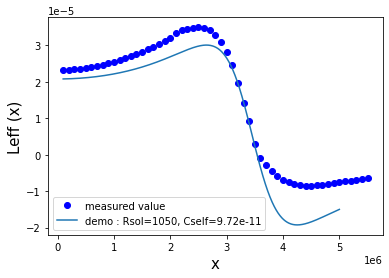

In [5]:
#plot measured data & curve using demo values
x_min = 100000
x_max = 5000000
N = 10000
x = np.linspace(x_min, x_max, N)
y = Leff(x)
plt.plot(xdata,ydata,'bo', label='measured value')
plt.plot(x,y, label='demo : Rsol=1050, Cself=9.72e-11')
plt.xlabel('x',fontsize = 15)
plt.ylabel('Leff (x)',fontsize =15)
plt.legend()
plt.show()

In [6]:
#for curve fit method with scipy.optimize
def func(x,a,b):
    Lself=2.08E-5
    Rs=1.2
    Rsol = a
    Cself = b
    y = (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)
    return y

In [7]:
initial_setting = []
initial_setting.append([1050,9.72E-11])

#OLS
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_setting)
# popt, pcov = curve_fit(func, xdata, ydata) #OptimizeWarning

In [8]:
#demo value
print('====demo values====')
print('Rsol : {}, Cself : {}'.format(Rsol,Cself))

#calculated value
print('====calculated values====')
print('Rsol : {}, Cself : {}'.format(popt[0],popt[1]))

#difference between demo values and calculated values
diff_Rsol = np.abs(Rsol - popt[0])
diff_Cself = np.abs(Cself - popt[1])
print('====difference between demo values and calculated values====')
print('diff_Rsol : {}, diff_Cself : {}'.format(diff_Rsol,diff_Cself))

====demo values====
Rsol : 1050, Cself : 9.72e-11
====calculated values====
Rsol : 915.1386568876418, Cself : 9.185316942259293e-11
====difference between demo values and calculated values====
diff_Rsol : 134.8613431123582, diff_Cself : 5.346830577407073e-12


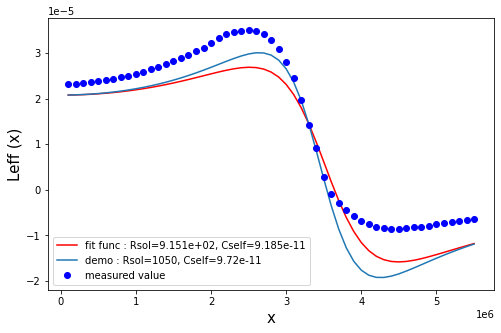

In [9]:
#plot figure
fig = plt.figure(figsize=(8,5))
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit func : Rsol=%5.3e, Cself=%5.3e' % tuple(popt))
plt.plot(xdata, func(xdata, Rsol,Cself),label='demo : Rsol=1050, Cself=9.72e-11')
plt.plot(xdata,ydata,'bo', label='measured value')
plt.xlabel('x',fontsize=15)
plt.ylabel('Leff (x)',fontsize=15)
plt.legend()
plt.show()

↑biasで1/1000000くらい足せばもっとましになるんじゃね？

#### add comment：

OriginProでも同様な結果が得られたので、この結果は間違えていないのではと考えている

## ref.
- Optimization and root finding (scipy.optimize)
    - https://docs.scipy.org/doc/scipy/reference/optimize.html<br>
- scipy.optimize.least_squares
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
- scipy.optimize.curve_fit
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit